### Transformation
+ RDD(Rsilient Distributed Dataset): 불변성을 가지며 병렬로 처리할 수 있는 파티셔닝된 레코드의 모음
    + RDD: 불변성, 한번 생성하면 변경할 수 없음
+ Transformation: 원하는 변경 방법을 알려주는 명령. 추상적인 변경 방법이며, 실제 수행X
+ Lazy Evaluation(지연 연산): 특정 연산 명령을 하면 즉시 데이터를 수정하지 않고, 원시 데이터에 적용할 트랜스포메이션 실행계획 생성하고, 실제로 연산 그래프를 처리하기 직전까지 기다림
+ 전체 데이터 흐름 최적화

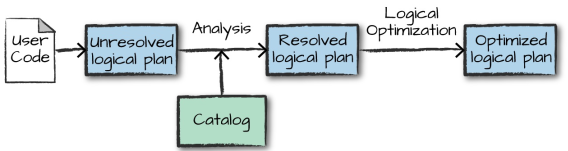

+ narrow dependency(좁은 의존성): 하나의 파티션 내에서만

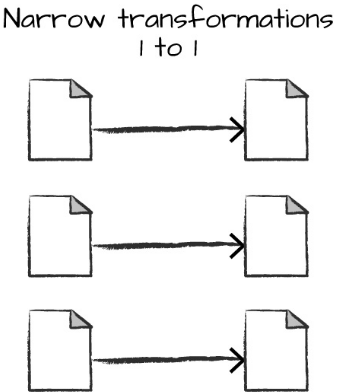


+ wide dependency: 하나의 입력 파티션이 여러 출력 파티션에 영향(shuffle)

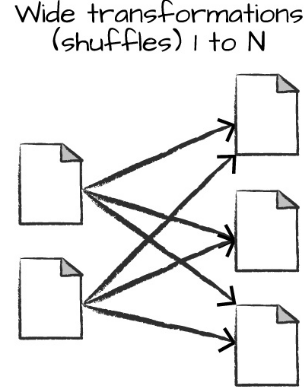

+ Action: 실제 연산 수행

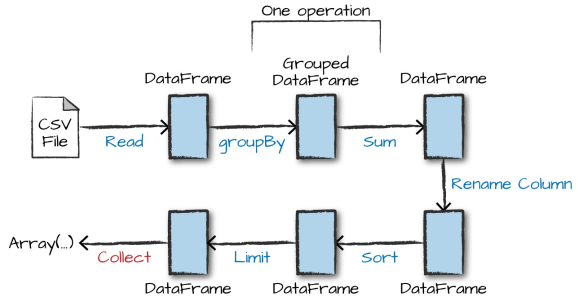

https://spark.apache.org/docs/latest/rdd-programming-guide.html#transformations

#### DataFrame
+ df.printSchema() # 스키마
+ df.schema # StructType
+ df.columns # 컬럼명
+ df.show(n) # show dataframe
+ df.first() # show first of row
+ df.head(n) # show head of row
+ df.createOrReplaceTempView # view
+ df.sample(withReplacement, fraction, seed) # random sampling
+ df.randomSplit() # random split
+ df.union(newdf) # df와 newdf 로우 concat
+ df.limit(n) # 추출할 로우수 제한 (Transformation)
+ df.repartition(n) #, 파티션 재분배, 셔플발생
+ df.coalesce() # 셔플하지 않고 파티션을 병합
+ df.collect() # 모든 데이터 수집, 반환 (Action)
+ df.take(n) # 상위 n개 로우 반환 (Action)
+ df.toLocalIterator() # iterator로 모든 파티션의 데이터를 드라이버에 전달, 파티션을 차례대로 반복처리 

---
#### DataFrame 컬럼관련 메서드
+ df.select # 컬럼이나 표현식 사용 
+ df.selectExpr # 문자열 표현식 사용 = df.select(expr())
+ df.withColumn(컬럼명, 표현식) # 컬럼 추가, 비교, 컬럼명 변경
+ df.withColumnRenamed(old_name, new_name) # 컬럼명 변경
+ df.drop() # 컬럼 삭제
+ df.where # 로우 필터링
+ df.filter # 로우 필터링
+ df.sort, df.orderBy # 정렬
+ df.sortWithinPartitions # 파티션별 정렬

---
#### 컬럼관련 함수
+ expr("someCol - 5") # 표현식
+ lit() # 리터럴
+ cast() # 컬럼 데이터 타입 변경
+ distinct() # unique row
+ desc(), asc() # 정렬 순서
---
#### 로우
+ Row() # 로우 생성

## Chapter 5. 구조적 API 기본 연산
+ <strong>DataFrame</strong> 구성요소: 레코드, 컬럼
    + 레코드: Row타입(Table의 로우)
    + 컬럼: 레코드에 수행할 연산 표현식(테이블의 컬럼)
+ <strong>스키마</strong>: 각 컬럼명과 데이터 타입을 정의
+ <strong>파티셔닝</strong>: DataFrame이나 Dataset이 클러스터에서 물리적으로 배치되는 형태를 정의
+ <strong>파티셔닝 스키마</strong>: 파이션을 배치하는 방법을 정의

+ SparkSession: 스파크 코드를 실행하기 위한 진입점

In [16]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [17]:
""" 스키마 확인하기 """
df.printSchema()

root
 |-- DEST_COUNTRY_NAME: string (nullable = true)
 |-- ORIGIN_COUNTRY_NAME: string (nullable = true)
 |-- count: long (nullable = true)



In [18]:
df = spark.read.format("json").load("./data/flight-data/json/2015-summary.json") # 미국 교통통계국이 제공하는 항공운항 데이터
df.printSchema()

root
 |-- DEST_COUNTRY_NAME: string (nullable = true)
 |-- ORIGIN_COUNTRY_NAME: string (nullable = true)
 |-- count: long (nullable = true)



In [19]:
df2 = spark.read.load("./data/flight-data/json/2015-summary.json", format="json")
df2.printSchema()

root
 |-- DEST_COUNTRY_NAME: string (nullable = true)
 |-- ORIGIN_COUNTRY_NAME: string (nullable = true)
 |-- count: long (nullable = true)



In [20]:
df3 = spark.read.json("./data/flight-data/json/2015-summary.json")
df3.printSchema()

root
 |-- DEST_COUNTRY_NAME: string (nullable = true)
 |-- ORIGIN_COUNTRY_NAME: string (nullable = true)
 |-- count: long (nullable = true)



### 5.1 스키마
+ 스키마: 여러 개의 StructField 타입 필드로 구성된 StructType 객체

In [21]:
""" 스키마 구조 """
df.schema

StructType(List(StructField(DEST_COUNTRY_NAME,StringType,true),StructField(ORIGIN_COUNTRY_NAME,StringType,true),StructField(count,LongType,true)))

+ StructField: (이름), (데이터 타입), (컬럼이 값이 없거나 null일 수 있는지 지정하는 불리언 값) 으로 구성
---
+ https://spark.apache.org/docs/latest/api/java/index.html?org/apache/spark/sql/types/StructField.html
+ StructField(String name, DataType dataType, boolean nullable, Metadata metadata)
+ Metadata: 해당 컬럼과 관련된 정보이며, 스파크의 머신러닝 라이브러리에서 사용

In [22]:
""" 스키마를 직접 만들어 적용 """
from pyspark.sql.types import StructField, StructType, StringType, LongType

myManualSchema = StructType([
    StructField("DEST_COUNTRY_NAME", StringType(), True),
    StructField("ORIGIN_COUNTRY_NAME", StringType(), True),
    StructField("count", LongType(), False, metadata={"hello":"world"})
])

df = spark.read.format("json")\
    .schema(myManualSchema)\
    .load("./data/flight-data/json/2015-summary.json")

In [23]:
df.show(10)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
|            Egypt|      United States|   15|
|    United States|              India|   62|
|    United States|          Singapore|    1|
|    United States|            Grenada|   62|
|       Costa Rica|      United States|  588|
|          Senegal|      United States|   40|
|          Moldova|      United States|    1|
+-----------------+-------------------+-----+
only showing top 10 rows



In [24]:
df2 = spark.read.load("./data/flight-data/json/2015-summary.json", format="json", schema=myManualSchema)
df.show(10)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
|            Egypt|      United States|   15|
|    United States|              India|   62|
|    United States|          Singapore|    1|
|    United States|            Grenada|   62|
|       Costa Rica|      United States|  588|
|          Senegal|      United States|   40|
|          Moldova|      United States|    1|
+-----------------+-------------------+-----+
only showing top 10 rows



### 5.2 컬럼과 표현식
+ <strong>컬럼: 표현식을 사용해 레코드 단위로 계산한 값을 단순하게 나타내는 논리적인 구조</strong> (테이블의 컬럼으로 생각할 수 있음)
+ 컬럼의 실제값을 얻으려면 로우가 필요하고, 로우를 얻으려면 DataFrame이 필요 (로우는 데이터 레코드)
+ DataFrame을 통하지 않으면 외부에서 컬럼에 접근 불가
+ 즉, DF -> row -> column
---
+ 컬럼의 내용을 수정하려면 반드시 DataFrame의 스파크 트랜포메이션을 사용

#### 5.2.1 컬럼
+ col, column 함수를 사용하는 것이 가장 간편 (책에서는 col 함수 사용)
+ 컬럼은 컬럼명을 카탈로그에 저장된 정보와 비교하기 전까지 미확인 상태
+ 분석기가 동작하는 단계에서 컬럼과 테이블을 분석

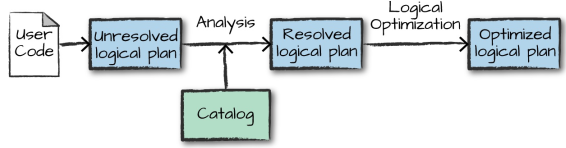

In [25]:
""" 컬럼 생성 """
from pyspark.sql.functions import col, column

col("someColumnName")

Column<b'someColumnName'>

In [26]:
column("someColumnName")

Column<b'someColumnName'>

#### 5.2.2 표현식
+ <strong>표현식: DataFrame 레코드의 여러 값에 대한 트랜스포메이션 집합을 의미</strong>
+ 여러 컬럼명을 입력받아 식별하고 단일 값을 만들기 위해 다양한 표현식을 각 레코드에 적용하는 함수
+ <strong>표현식은 expr함수로 사용</strong>

In [27]:
from pyspark.sql.functions import expr

print(expr("someCol - 5"))
print(expr("someCol") - 5)
print(col("someCol") - 5)
# 동일한 트랜스포메이션 과정: 스파크는 연산 순서를 지정하는 논리적 트리로 컴파일이기 때문

Column<b'(someCol - 5)'>
Column<b'(someCol - 5)'>
Column<b'(someCol - 5)'>


In [28]:
(((col("somecol") + 5) * 200) - 6) < col("othercol")

Column<b'((((somecol + 5) * 200) - 6) < othercol)'>

In [29]:
""" 논리적 트리로 컴파일되는 표현식 """
from pyspark.sql.functions import expr

expr("(((someCol + 5) * 200) - 6) < otherCol")

Column<b'((((someCol + 5) * 200) - 6) < otherCol)'>

+ DAG(Directed Acyclic Graph, 지향성 비순환 그래프)
+ SQL과 DataFrame은 실행 시점에서 동일한 논리 트리(논리적 실행계획)으로 컴파일되기 때문에 동일한 성능을 발휘함

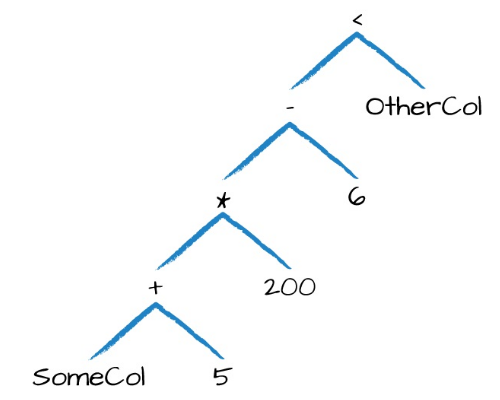

##### DataFrame 컬럼에 접근하기
+ 프로그래밍 방식으로 컬럼에 접근할 때는 DataFrame의 columns 속성을 사용함

In [30]:
df.printSchema()

root
 |-- DEST_COUNTRY_NAME: string (nullable = true)
 |-- ORIGIN_COUNTRY_NAME: string (nullable = true)
 |-- count: long (nullable = true)



In [31]:
""" columns 속성을 사용 """
spark.read.format("json").load("./data/flight-data/json/2015-summary.json").columns

['DEST_COUNTRY_NAME', 'ORIGIN_COUNTRY_NAME', 'count']

+ <strong>컬럼은 단지 표현식일 뿐</strong>
+ <strong>표현식은 연산 순서를 지정하는 논리적 트리로 컴파일됨</strong>

### 5.3 레코드와 로우
+ 스파크는 레코드를 Row 객체로 표현
    + (각 로우는 하나의 레코드, '로우'와 '레코드'를 같은 의미로 사용)
    + (대문자로 시작하는 Row는 Row 객체를 의미)
+ Row 객체는 내부에 바이트 배열을 가지며, 오직 컬럼 표현식으로만 다룰 수 있으므로 사용자에게 노출되지 않음
+ DataFrame을 사용해 드라이버에게 개별 로우를 반환하는 명령은 항상 하나 이상의 Row 타입을 반환

In [32]:
""" Row를 확인하는 예문 """
df.first()

Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Romania', count=15)

In [33]:
df.head()

Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Romania', count=15)

In [34]:
df.head(2)

[Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Romania', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Croatia', count=1)]

+ Row 객체는 스키마 정보를 가지고 있지 않음 (DataFrame만 유일하게 스키마를 가지고 있음)
+ Row 객체를 직접 생성하려면 DataFrame의 스키마와 같은 순서로 값을 명시

In [35]:
""" 로우 생성하기 """
from pyspark.sql import Row

myRow = Row("Hello", None, 1, False)

In [36]:
""" 로우 접근하기 """
print(myRow[0])
print(myRow[2])

Hello
1


In [37]:
myRow

TypeError: sequence item 1: expected str instance, NoneType found

In [38]:
[*myRow]

['Hello', None, 1, False]

### 5.4 DataFrame의 트랜스포메이션
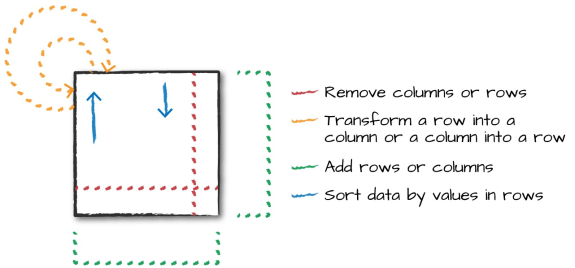
+ 로우나 컬럼 추가
+ 로우나 컬럼 제거
+ 로우를 컬럼으로 변환하거나, 그 반대로 변환
+ 컬럼값을 기준으로 로우 순서 변경

#### 5.4.1 DataFrame 생성하기
+ 원시 데이터소스에서 DataFrame을 생성하고 임시 뷰를 등록
+ Row 객체를 가진 Seq 타입을 직접 전환하여 DataFrame을 생성

In [39]:
""" 원시 데이터소스 활용 """
df = spark.read.format("json")\
    .load("./data/flight-data/json/2015-summary.json")

df.createOrReplaceTempView("dfTable")

sql_result = spark.sql("""
    SELECT *
    FROM dfTable
""").show()

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|            Romania|   15|
|       United States|            Croatia|    1|
|       United States|            Ireland|  344|
|               Egypt|      United States|   15|
|       United States|              India|   62|
|       United States|          Singapore|    1|
|       United States|            Grenada|   62|
|          Costa Rica|      United States|  588|
|             Senegal|      United States|   40|
|             Moldova|      United States|    1|
|       United States|       Sint Maarten|  325|
|       United States|   Marshall Islands|   39|
|              Guyana|      United States|   64|
|               Malta|      United States|    1|
|            Anguilla|      United States|   41|
|             Bolivia|      United States|   30|
|       United States|           Paraguay|    6|
|             Algeri

In [40]:
""" Row 객체 활용 """
from pyspark.sql import Row
from pyspark.sql.types import StructField, StructType, StringType, LongType

myManualSchema = StructType([
    StructField("some", StringType(), True),
    StructField("col", StringType(), True),
    StructField("names", LongType(), False)
])

myRow = Row("Hello", None, 1)
myDf = spark.createDataFrame([myRow], myManualSchema)
myDf.show()

+-----+----+-----+
| some| col|names|
+-----+----+-----+
|Hello|null|    1|
+-----+----+-----+



+ select 메서드: 컬림 또는 표현식 사용
+ selectExpr 메서드: 문자열 표현식 사용
+ org.apache.spark.sql.functions 의 다양한 함수

#### 5.4.2 select와 selectExpr

In [41]:
""" 단일 혹은 다중 컬럼 설정 """
df.select("DEST_COUNTRY_NAME").show(2)
df.select("DEST_COUNTRY_NAME", "ORIGIN_COUNTRY_NAME").show(2)

+-----------------+
|DEST_COUNTRY_NAME|
+-----------------+
|    United States|
|    United States|
+-----------------+
only showing top 2 rows

+-----------------+-------------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|
+-----------------+-------------------+
|    United States|            Romania|
|    United States|            Croatia|
+-----------------+-------------------+
only showing top 2 rows



In [42]:
""" 컬럼을 참조하는 다앙한 방법 """
df.select(
    "DEST_COUNTRY_NAME",
    expr("DEST_COUNTRY_NAME"),
    col("DEST_COUNTRY_NAME"),
    column("DEST_COUNTRY_NAME")
).show(2)

+-----------------+-----------------+-----------------+-----------------+
|DEST_COUNTRY_NAME|DEST_COUNTRY_NAME|DEST_COUNTRY_NAME|DEST_COUNTRY_NAME|
+-----------------+-----------------+-----------------+-----------------+
|    United States|    United States|    United States|    United States|
|    United States|    United States|    United States|    United States|
+-----------------+-----------------+-----------------+-----------------+
only showing top 2 rows



In [43]:
""" 책에서는 오류가 난다고 했는데? """
df.select(
    col("DEST_COUNTRY_NAME"),
    "DEST_COUNTRY_NAME",
).show(2)

+-----------------+-----------------+
|DEST_COUNTRY_NAME|DEST_COUNTRY_NAME|
+-----------------+-----------------+
|    United States|    United States|
|    United States|    United States|
+-----------------+-----------------+
only showing top 2 rows



In [44]:
""" expr를 이용한 컬럼 참조 """
df.select(expr("DEST_COUNTRY_NAME AS destination")).show(2)
df.select(expr("DEST_COUNTRY_NAME AS destination").alias("DEST_COUNTRY_NAME")).show(2)

+-------------+
|  destination|
+-------------+
|United States|
|United States|
+-------------+
only showing top 2 rows

+-----------------+
|DEST_COUNTRY_NAME|
+-----------------+
|    United States|
|    United States|
+-----------------+
only showing top 2 rows



+ select메서드에 expr 함수를 사용하는 패턴을 자주 사용함
+ 스파크는 이를 위해 selectExpr 메서드를 제공

In [45]:
""" selectExpr 활용 예문 """
df.selectExpr("DEST_COUNTRY_NAME as newColmnName", "DEST_COUNTRY_NAME").show(2)
df.selectExpr("*", "(DEST_COUNTRY_NAME = ORIGIN_COUNTRY_NAME) as withinCountry").show(2)

+-------------+-----------------+
| newColmnName|DEST_COUNTRY_NAME|
+-------------+-----------------+
|United States|    United States|
|United States|    United States|
+-------------+-----------------+
only showing top 2 rows

+-----------------+-------------------+-----+-------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|withinCountry|
+-----------------+-------------------+-----+-------------+
|    United States|            Romania|   15|        false|
|    United States|            Croatia|    1|        false|
+-----------------+-------------------+-----+-------------+
only showing top 2 rows



In [46]:
""" 집계함수 지정하기 """
df.selectExpr("avg(count)", "count(distinct(DEST_COUNTRY_NAME))").show()

+-----------+---------------------------------+
| avg(count)|count(DISTINCT DEST_COUNTRY_NAME)|
+-----------+---------------------------------+
|1770.765625|                              132|
+-----------+---------------------------------+



#### 5.4.3 스파크 데이터 타입으로 변환하기

In [48]:
""" 
리터럴(literal)을 사용한 컬럼 추가
리터럴: 어떤 상수나 프로그래밍으로 생성된 변수값이 특정 컬럼의 값보다 큰지 확인할 때 사용
익명함수?
"""
from pyspark.sql.functions import lit

df.select(expr("*"), lit(1).alias("One")).show(2)

+-----------------+-------------------+-----+---+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|One|
+-----------------+-------------------+-----+---+
|    United States|            Romania|   15|  1|
|    United States|            Croatia|    1|  1|
+-----------------+-------------------+-----+---+
only showing top 2 rows



#### 5.4.4 컬럼 추가하기


In [49]:
""" 
withColumn으로 컬럼 추가 
withColumn(컬럼명, 표현식)
"""
df.withColumn("numberOne", lit(1)).show(2)

+-----------------+-------------------+-----+---------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|numberOne|
+-----------------+-------------------+-----+---------+
|    United States|            Romania|   15|        1|
|    United States|            Croatia|    1|        1|
+-----------------+-------------------+-----+---------+
only showing top 2 rows



In [50]:
""" 컬럼 비교 """
df.withColumn("withinCountry", expr("ORIGIN_COUNTRY_NAME == DEST_COUNTRY_NAME")).show(2)

+-----------------+-------------------+-----+-------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|withinCountry|
+-----------------+-------------------+-----+-------------+
|    United States|            Romania|   15|        false|
|    United States|            Croatia|    1|        false|
+-----------------+-------------------+-----+-------------+
only showing top 2 rows



In [51]:
""" 컬럼명 바꾸기 """
df.withColumn("Destination", expr("DEST_COUNTRY_NAME")).columns

['DEST_COUNTRY_NAME', 'ORIGIN_COUNTRY_NAME', 'count', 'Destination']

#### 5.4.5 컬럼명 바꾸기

In [52]:
""" withColumnRenamed """
df.withColumnRenamed("DEST_COUNTRY_NAME", "dest").columns

['dest', 'ORIGIN_COUNTRY_NAME', 'count']

#### 5.4.6 예약 문자와 키워드
+ 공백이나 하이픈(-) 같은 예약 문자를 컬럼명에 사용하려면 백틱(`) 문자를 사용해야 함

In [53]:
""" withColumn, selectExpr, select 차이점 """
dfWithLongColName = df.withColumn("This Long Column-Name", expr("ORIGIN_COUNTRY_NAME")) # 첫 번째 인수에서 사용하지 않음
dfWithLongColName.show(2)

dfWithLongColName.selectExpr("`This Long Column-Name`", "`This Long Column-Name` as `new col`").show(2) # 사용함

dfWithLongColName.select(expr("`This Long Column-Name`")).show(2)

+-----------------+-------------------+-----+---------------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|This Long Column-Name|
+-----------------+-------------------+-----+---------------------+
|    United States|            Romania|   15|              Romania|
|    United States|            Croatia|    1|              Croatia|
+-----------------+-------------------+-----+---------------------+
only showing top 2 rows

+---------------------+-------+
|This Long Column-Name|new col|
+---------------------+-------+
|              Romania|Romania|
|              Croatia|Croatia|
+---------------------+-------+
only showing top 2 rows

+---------------------+
|This Long Column-Name|
+---------------------+
|              Romania|
|              Croatia|
+---------------------+
only showing top 2 rows



#### 5.4.7 대소문자 구분
+ 기본적으로 스파크는 대소문자를 가리지 않음
```
set spark.sql.caseSensitive true # 대소문자를 구분하기 위한 옵션
```

#### 5.4.8 컬럼 제거하기

In [54]:
""" drop 함수 """

df.drop("ORIGIN_COUNTRY_NAME").columns

['DEST_COUNTRY_NAME', 'count']

In [55]:
""" drop 함수 """

dfWithLongColName.drop("ORIGIN_COUNTRY_NAME", "DEST_COUNTRY_NAME").columns # 여러 컬럼을 지우기

['count', 'This Long Column-Name']

#### 5.4.9 컬럼의 데이터 타입 변경하기

In [56]:
""" cast 함수 """
df.withColumn("count2", col("count").cast("string"))
# cast null값, 문자->숫자 에러

DataFrame[DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string, count: bigint, count2: string]

In [61]:
df.show(5)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
|            Egypt|      United States|   15|
|    United States|              India|   62|
+-----------------+-------------------+-----+
only showing top 5 rows



#### 5.4.10 로우 필터링하기

In [58]:
""" filter, where 함수 """
df.where(col("count") < 2).show(2)
df.filter(col("count") < 2).show(2)

df.where("count < 2").show(2)
df.filter("count < 2").show(2)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Croatia|    1|
|    United States|          Singapore|    1|
+-----------------+-------------------+-----+
only showing top 2 rows

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Croatia|    1|
|    United States|          Singapore|    1|
+-----------------+-------------------+-----+
only showing top 2 rows

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Croatia|    1|
|    United States|          Singapore|    1|
+-----------------+-------------------+-----+
only showing top 2 rows

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+----

In [59]:
""" 같은 표현식에 여러 필터를 적용 """
df.where(col("count") < 2).where(col("ORIGIN_COUNTRY_NAME") != "Croatia").show(2)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|          Singapore|    1|
|          Moldova|      United States|    1|
+-----------------+-------------------+-----+
only showing top 2 rows



#### 5.4.11 고유한 로우 얻기

In [60]:
""" distinct 함수 """
print(df.select("ORIGIN_COUNTRY_NAME", "DEST_COUNTRY_NAME").distinct().count())
print(df.select("ORIGIN_COUNTRY_NAME").distinct().count())
# distinctcount?

256
125


#### 5.4.12 무작위 샘플 만들기

In [61]:
""" sample 함수 """
seed = 5
withReplacement = False
fraction = 0.5
df.sample(withReplacement, fraction, seed).count()

126

#### 5.4.13 임의 분할하기

In [62]:
""" randomSplit 함수 """
seed = 42
dataFrames = df.randomSplit([0.25, 0.75], seed)
print(dataFrames[0].count())
print(dataFrames[1].count())

66
190


#### 5.4.14 로우 합치기와 추가하기
+ 동일한 스키마와 컬럼 수를 가져야 함

In [63]:
""" union 함수 """
from pyspark.sql import Row

schema = df.schema
newRows = [
    Row("New Country", "Other Country", 5),
    Row("New Country 2", "Other Country 3", 1)
]

# Parallelized Collections :
# Parallelized collections are created by calling SparkContext’s parallelize method on an existing iterable or collection in your driver program.
# The elements of the collection are copied to form a distributed dataset that can be operated on in parallel. 

parallelizedRows = spark.sparkContext.parallelize(newRows) 
newDF = spark.createDataFrame(parallelizedRows, schema)

newDF.show()

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|      New Country|      Other Country|    5|
|    New Country 2|    Other Country 3|    1|
+-----------------+-------------------+-----+



In [64]:
df.union(newDF)\
    .where("count = 1")\
    .where(col("ORIGIN_COUNTRY_NAME") != "United States")\
    .show()

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Croatia|    1|
|    United States|          Singapore|    1|
|    United States|          Gibraltar|    1|
|    United States|             Cyprus|    1|
|    United States|            Estonia|    1|
|    United States|          Lithuania|    1|
|    United States|           Bulgaria|    1|
|    United States|            Georgia|    1|
|    United States|            Bahrain|    1|
|    United States|   Papua New Guinea|    1|
|    United States|         Montenegro|    1|
|    United States|            Namibia|    1|
|    New Country 2|    Other Country 3|    1|
+-----------------+-------------------+-----+



#### 5.4.15 로우 정렬하기
+ asc, desc 함수를 사용하여 정렬 순서를 지정
+ asc_nulls_first, desc_nulls_first, asc_nulls_last, desc_nulls_last 메서드로 null의 정렬 순서를 지정
+ sortWithinPartitions 함수는 파티션별 정렬을 지원 (트랜스포메이션 처리 전 성능 최적화 목적)

In [34]:
""" sort, orderBy 함수 """
df.sort("count").show(5)
df.orderBy("count", "DEST_COUNTRY_NAME").show(5)
df.orderBy(col("count"), col("DEST_COUNTRY_NAME")).show(5)

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|               Malta|      United States|    1|
|Saint Vincent and...|      United States|    1|
|       United States|            Croatia|    1|
|       United States|          Gibraltar|    1|
|       United States|          Singapore|    1|
+--------------------+-------------------+-----+
only showing top 5 rows

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|     Burkina Faso|      United States|    1|
|    Cote d'Ivoire|      United States|    1|
|           Cyprus|      United States|    1|
|         Djibouti|      United States|    1|
|        Indonesia|      United States|    1|
+-----------------+-------------------+-----+
only showing top 5 rows

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--

In [35]:
""" 정렬순서 지정하기 """
from pyspark.sql.functions import desc, asc

df.orderBy(expr("count desc")).show(5)
df.orderBy(col("ORIGIN_COUNTRY_NAME").desc(), col("DEST_COUNTRY_NAME").asc()).show(5) # 예제 변경

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|               Malta|      United States|    1|
|Saint Vincent and...|      United States|    1|
|       United States|            Croatia|    1|
|       United States|          Gibraltar|    1|
|       United States|          Singapore|    1|
+--------------------+-------------------+-----+
only showing top 5 rows

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Vietnam|    2|
|    United States|          Venezuela|  246|
|    United States|            Uruguay|   13|
|          Algeria|      United States|    4|
|           Angola|      United States|   15|
+-----------------+-------------------+-----+
only showing top 5 rows



In [36]:
""" 파티션별 정렬 """ 
# 최적화는 3부에서 자세히 소개할 예정
spark.read.format("json").load("./data/flight-data/json/*-summary.json").sortWithinPartitions("count").show() 

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|            Croatia|    1|
|       United States|          Singapore|    1|
|             Moldova|      United States|    1|
|               Malta|      United States|    1|
|       United States|          Gibraltar|    1|
|Saint Vincent and...|      United States|    1|
|            Suriname|      United States|    1|
|       United States|             Cyprus|    1|
|        Burkina Faso|      United States|    1|
|            Djibouti|      United States|    1|
|       United States|            Estonia|    1|
|              Zambia|      United States|    1|
|              Cyprus|      United States|    1|
|       United States|          Lithuania|    1|
|       United States|           Bulgaria|    1|
|       United States|            Georgia|    1|
|       United States|            Bahrain|    1|
|       Cote d'Ivoir

#### 5.4.16 로우 수 제한하기


In [37]:
df.limit(5).show()
df.orderBy(expr("count desc")).limit(6).show()

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
|            Egypt|      United States|   15|
|    United States|              India|   62|
+-----------------+-------------------+-----+

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|               Malta|      United States|    1|
|Saint Vincent and...|      United States|    1|
|       United States|            Croatia|    1|
|       United States|          Gibraltar|    1|
|       United States|          Singapore|    1|
|             Moldova|      United States|    1|
+--------------------+-------------------+-----+



#### 5.4.17 repartition과 cocalesce
+ 향후에 사용할 파티션 수가 현재 파티션 수보다 많거나 컬럼을 기준으로 파티션을 만드는 경우에 사용(repartition, 셔플이 필수로 발생)
+ 자주 필터링되는 컬럼을 기준으로 파티션 재분배를 권장
+ repartition: 물리적인 데이터 구성 제어

In [38]:
""" 파티션 나누기 """
df.rdd.getNumPartitions()
df.repartition(5)
df.repartition(col("DEST_COUNTRY_NAME"))
df.repartition(5, col("DEST_COUNTRY_NAME"))
# repartition 숫자 변경 등 실험내용 공유

DataFrame[DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string, count: bigint]

+ 셔플하지 않고 파티션을 병합

In [39]:
""" 파티션 합치기 """
df.repartition(5, col("DEST_COUNTRY_NAME")).coalesce(2)

DataFrame[DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string, count: bigint]

#### 5.4.18 드라이버로 로우 데이터 수집하기
+ 대규모 데이터셋에 collect 명령을 수행하면 드라이버 비정상 종료 우려

In [69]:
collectDF = df.limit(5)
collectDF.take(5) # 정수를 인수값으로 사용

[Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Romania', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Croatia', count=1),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Ireland', count=344),
 Row(DEST_COUNTRY_NAME='Egypt', ORIGIN_COUNTRY_NAME='United States', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='India', count=62)]

In [70]:
collectDF.show()  # 결과를 정돈된 형태로 출력

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
|            Egypt|      United States|   15|
|    United States|              India|   62|
+-----------------+-------------------+-----+



In [71]:
collectDF.show(5, False)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|United States    |Romania            |15   |
|United States    |Croatia            |1    |
|United States    |Ireland            |344  |
|Egypt            |United States      |15   |
|United States    |India              |62   |
+-----------------+-------------------+-----+



In [72]:
collectDF.collect() # 전체 모든 테이터를 수집, 반환

[Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Romania', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Croatia', count=1),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Ireland', count=344),
 Row(DEST_COUNTRY_NAME='Egypt', ORIGIN_COUNTRY_NAME='United States', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='India', count=62)]

In [73]:
collectDF.toLocalIterator()

+ 대규모 데이터셋에 collect, toLocalIterator 수행하면 매우 큰 비용(cpu, 메모리, 네트워크) 발생, 드라이버 비정상적 종료 가능성

### cast

In [75]:
""" Row 객체 활용 """
from pyspark.sql import Row
from pyspark.sql.types import StructField, StructType, StringType, LongType

myManualSchema = StructType([
    StructField("some", StringType(), True),
    StructField("num", StringType(), True),
    StructField("count", StringType(), True)
])

myRow1 = Row("Hello", 1, 1)
myRow2 = Row("Hello", None, 'aaa')
myDf = spark.createDataFrame([myRow1, myRow2], myManualSchema)
myDf.show()

+-----+----+-----+
| some| num|count|
+-----+----+-----+
|Hello|   1|    1|
|Hello|null|  aaa|
+-----+----+-----+



In [76]:
myDf.withColumn("num2", col("num").cast("integer")).show()

+-----+----+-----+----+
| some| num|count|num2|
+-----+----+-----+----+
|Hello|   1|    1|   1|
|Hello|null|  aaa|null|
+-----+----+-----+----+



In [77]:
myDf.withColumn("count2", col("count").cast("integer")).show()

+-----+----+-----+------+
| some| num|count|count2|
+-----+----+-----+------+
|Hello|   1|    1|     1|
|Hello|null|  aaa|  null|
+-----+----+-----+------+



### distinct count

In [83]:
df.selectExpr("count(distinct(ORIGIN_COUNTRY_NAME))").show()

+-----------------------------------+
|count(DISTINCT ORIGIN_COUNTRY_NAME)|
+-----------------------------------+
|                                125|
+-----------------------------------+



In [84]:
print(df.select("ORIGIN_COUNTRY_NAME").distinct().count())

125


In [112]:
from pyspark.sql.functions import countDistinct, approxCountDistinct

df.select(countDistinct("ORIGIN_COUNTRY_NAME")).show()

+-----------------------------------+
|count(DISTINCT ORIGIN_COUNTRY_NAME)|
+-----------------------------------+
|                                125|
+-----------------------------------+



https://spark.apache.org/docs/2.2.1/api/java/org/apache/spark/sql/functions.html#approx_count_distinct-org.apache.spark.sql.Column-double-

In [121]:
df.select(approxCountDistinct("ORIGIN_COUNTRY_NAME", rsd=0.05)).show()
# rsd: Maximum estimation error allowed

+------------------------------------------+
|approx_count_distinct(ORIGIN_COUNTRY_NAME)|
+------------------------------------------+
|                                       116|
+------------------------------------------+



In [180]:
df.select(approxCountDistinct("ORIGIN_COUNTRY_NAME", rsd=0.1)).show()
# rsd: Maximum estimation error allowed

+------------------------------------------+
|approx_count_distinct(ORIGIN_COUNTRY_NAME)|
+------------------------------------------+
|                                       101|
+------------------------------------------+

